# Visualization of Football Database 

https://www.kaggle.com/technika148/football-database

*¿Qué pregunta quiero responder?*
- ¿Goleador más efectivo?
- ¿Desde qué posición del campo es más efectivo hacer goles?
- ¿En qué minuto de juego se conceden más goles?


*¿Qué me interesa observar?*
- Mejores goleadores
- Posición del tiro al arco que termino en gol
- Goles en cada minuto y como se genero (tiro libre, córner, jugada, etc)


In [2]:
import numpy as np
import pandas as pd

import datetime

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
leagues = pd.read_csv(r'data\leagues.csv')
teams = pd.read_csv(r'data\teams.csv', encoding='latin_1')
players = pd.read_csv(r'data\players.csv', encoding='latin_1')

shots = pd.read_csv(r'data\shots.csv')
teamstats = pd.read_csv(r'data\teamstats.csv')
appearances = pd.read_csv(r'data\appearances.csv')

In [4]:
# Esta funcion nos permite dibujar un campo de futbol con las dimenciones reglamentarias en una grafica

def draw_soccer_pitch(figsize=(14, 11)):
    
    """
    Function that plots a scaled soccer pitch of length 120*90 metres which 
    are the maximum dimensions allowed by FIFAs "Laws Of The Game"
    """
    
    rect = patches.Rectangle((-1, -1), 122, 92, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)
    # Main pitch markings, ie sidelines, penalty area and halfway line
    plt.plot([0, 0,  0, 120, 120, 0,     0,  16.5,  16.5,     0,     0,   5.5,   5.5, 
                  0,  0, 60, 60, 120,   120, 103.5, 103.5,   120,   120, 114.5, 114.5,   120], 
             [0, 0, 90,  90,   0, 0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 
              36.85, 90, 90,  0,   0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 36.85], color='white')
    
    # Secondary pitch markings, ie penalty spots, centre circle etc
    plt.plot([11, 11.5],[45, 45], color='white')
    plt.plot([109, 108.5],[45, 45], color='white')
    
    centre_circle = patches.Circle([60, 45], 9.15, edgecolor='white', facecolor='darkgreen')
    ax.add_patch(centre_circle)
    
    left_arc = patches.Arc([16.5, 45], 9.15, 16, theta1=270.0, theta2=90.0, color='white')
    ax.add_patch(left_arc)
    right_arc = patches.Arc([103.5, 45], 9.15, 16, theta1=90.0, theta2=270.0, color='white')
    ax.add_patch(right_arc)
    
    bl_corner = patches.Arc([0, 0], 2.5, 2.5, theta1=0.0, theta2=90.0, color='white')
    tl_corner = patches.Arc([0, 90], 2.5, 2.5, theta1=270.0, color='white')
    br_corner = patches.Arc([120, 0], 2.5, 2.5, theta1=90.0, theta2=180.0, color='white')
    tr_corner = patches.Arc([120, 90], 2.5, 2.5, theta1=180.0, theta2=270.0,color='white')
    ax.add_patch(bl_corner)
    ax.add_patch(tl_corner)
    ax.add_patch(br_corner)
    ax.add_patch(tr_corner)
    
    plt.xlim(-1, 121)
    plt.ylim(-1, 91)
    plt.axis('off')    

    return fig, ax

---

¿Goleador más efectivo?

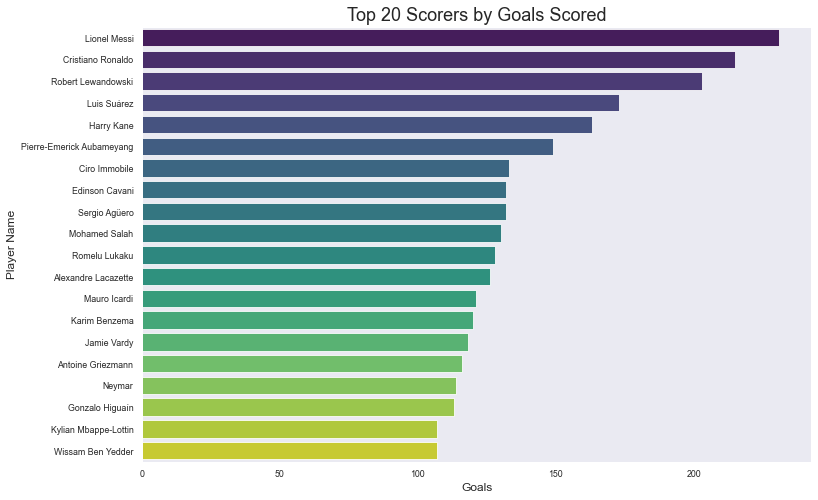

In [5]:
# Top 20 Strickers con mas goles

# Filter
best_strikers = pd.merge(appearances, players, on='playerID')
best_strikers = best_strikers.groupby('name').agg({'goals': 'sum', 'shots': 'sum'}).sort_values('goals', ascending=False).head(20).reset_index()

# Plot Style
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (12, 8)})


# Plot Configuration
ax = sns.barplot(data=best_strikers, y='name', x='goals', orient='h', palette='viridis')
ax.set_ylabel('Player Name', fontsize=12)
ax.set_xlabel('Goals', fontsize=12)
ax.set_title('Top 20 Scorers by Goals Scored', fontsize=18);

ax.grid(color='w', linewidth=0.5, alpha=0) 
plt.savefig(r"pictures\goals.png", transparent=True);

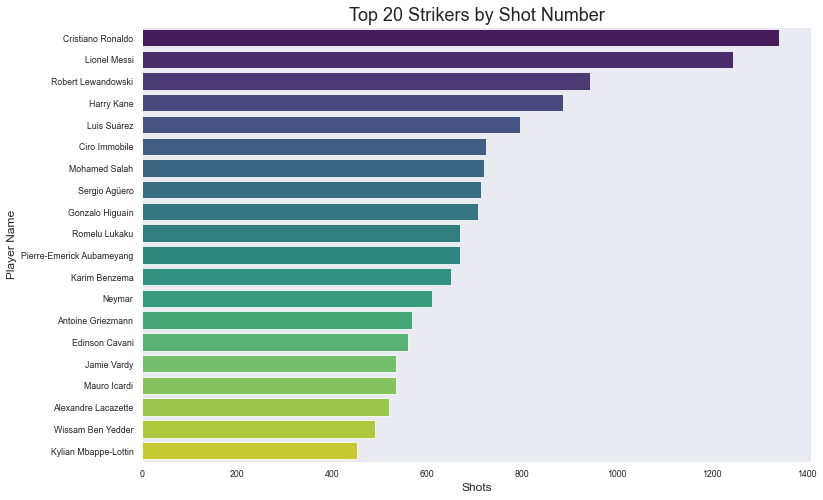

In [6]:
# Top 20 Strikers whit more Shots

# Plot Style
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (12, 8)})

# Plot Configuration
ax = sns.barplot(data=best_strikers.sort_values('shots', ascending=False), y='name', x='shots', orient='h', palette='viridis')
ax.set_ylabel('Player Name', fontsize=12)
ax.set_xlabel('Shots', fontsize=12)
ax.set_title('Top 20 Strikers by Shot Number', fontsize=18)

ax.grid(color='w', linewidth=0.5, alpha=0)
plt.savefig(r"pictures\shots.png", transparent=True);

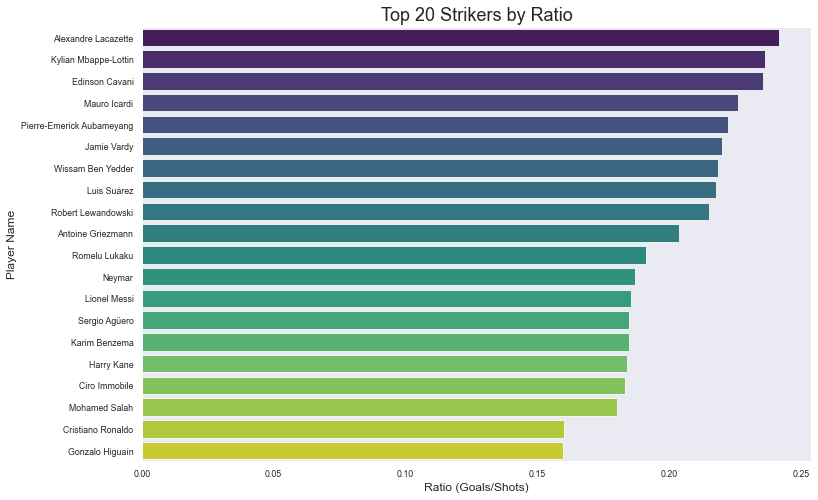

In [7]:
# Top 20 Strikers whit best Ratio (Goals/Shots)

# Filter
best_strikers['ratio'] = best_strikers['goals'] / best_strikers['shots']
best_strikers = best_strikers.sort_values('ratio', ascending=False)

# Plot Style
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (12, 8)})

# Plot Configuration
ax = sns.barplot(data=best_strikers, y='name', x='ratio', orient='h', palette='viridis')
ax.set_ylabel('Player Name', fontsize=12)
ax.set_xlabel('Ratio (Goals/Shots)', fontsize=12)
ax.set_title('Top 20 Strikers by Ratio', fontsize=18)

ax.grid(color='w', linewidth=0.5, alpha=0) 
plt.savefig(r'pictures\ratio.png', transparent=True);

Gracias al grafico de barras obtenido anteriormente se observa que Lacazette y Mbappe son los goleadores con mejor ratio goles/tiros al arco. Pero si observamos con mejor detalle (los datos están al final del notebook) se puede ver que Mbappe es el más joven de todos los jugadores de lista y no solo eso, la edad promedio del Top 20 es de 31 años mientras que la edad de Mbappe es de apenas 22. Lo que refleja una gran proyección a futuro y porque muchos equipos lo quieres. 

Por otro lado, vemos que Mbappe tiene el segundo mejor ratio de goles/tiros al arco. Finalmente, cuenta con una temporada menos de información, ya que se dio a conocer a partir de la temporada 2015-2016.

---

¿Desde qué posición del campo es más efectivo hacer goles?

In [8]:
# Vamos a obtener un DataFrame que solo contenga los goles que terminaron en goles y los autores. Para ello tenemos que
# unir la tabla shots con la tabla player a traves de la llave 'playerID'

goals = shots[(shots['shotResult'] == 'Goal')]
goals.rename(columns = {'shooterID': 'playerID'}, inplace=True)
goals = pd.merge(goals, players, on='playerID')

# Las posiciones de los goles estan normalizadas. Las multiplicamos por las dimenciones de la cancha
goals['positionX'] = goals['positionX'].apply(lambda x: x * 120)
goals['positionY'] = goals['positionY'].apply(lambda x: x * 90)

# Tomamos el nombre de los mejores goleadores y lo colocamos en una lista
top = best_strikers['name']

C:\Users\sasim\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


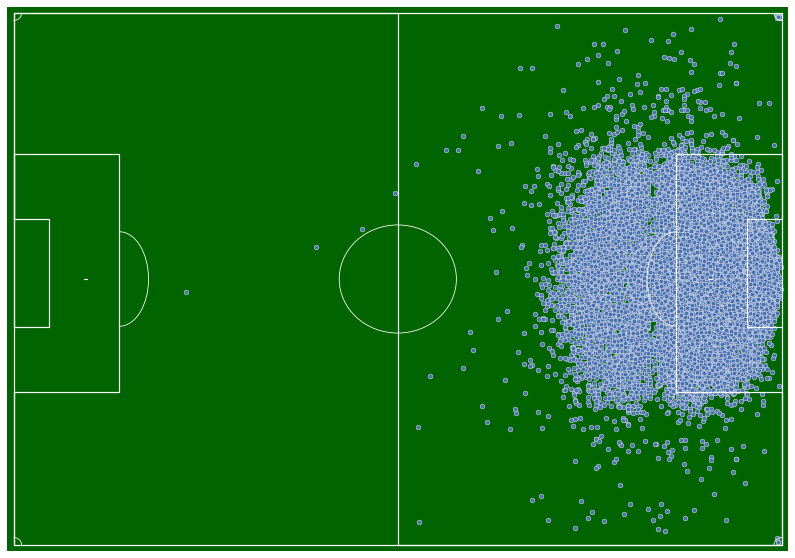

In [9]:
# Scatter plot of all the Goals

# Plot Style
draw_soccer_pitch(figsize=(14, 10))
plt.style.use('tableau-colorblind10')

# Plot Configuration
sns.scatterplot(data=goals, x='positionX', y='positionY')
plt.savefig(r"pictures\all_goals.png", transparent=True)
plt.show()

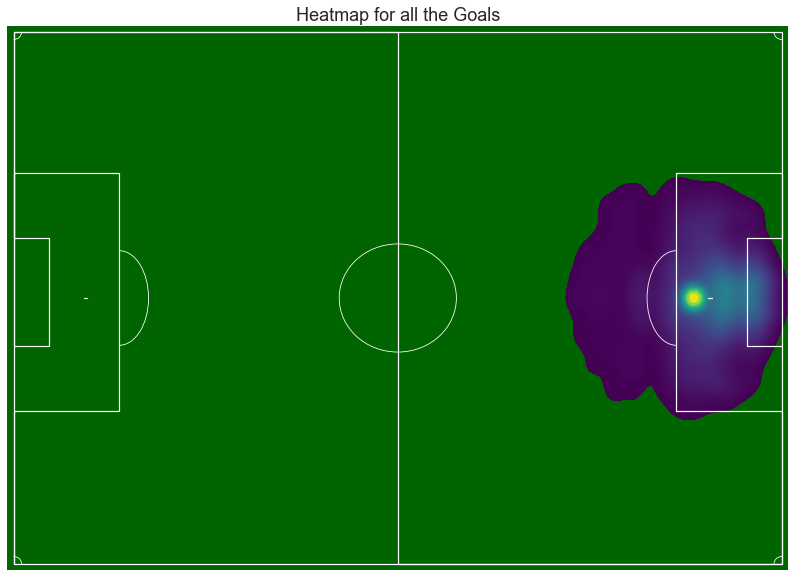

In [10]:
# Heatmap of all the Goals

# Ploat Style
draw_soccer_pitch(figsize=(14, 10))
plt.style.use('tableau-colorblind10')

# Plot Configuration
ax = sns.kdeplot(x=goals['positionX'], y=goals['positionY'], shade=True, n_levels=100, cmap='viridis')
ax.set_title(f'Heatmap for all the Goals', fontsize=18)
plt.savefig(r"pictures\heatmap.png", transparent=True)
plt.show()

A partir de esta gráfica se concluye que la mejor posición para hacer gol es en el centro del área, ya que es donde se hicieron la mayor cantidad de goles. Dentro de nuestro mapa de calor se encuentra el 96% de todos nuestros goles (que son un total de 34.500).

Por otro lado, el porcentaje de goles realizados por penalti son de apenas un 9%. Esto es importante mencionarlo, ya que se podría pensar que los goles por penalti están causando que el punto de mayor densidad de goles sea el mostrado en la gráfica. Sin embargo, el porcentaje nos demuestra lo contrario.

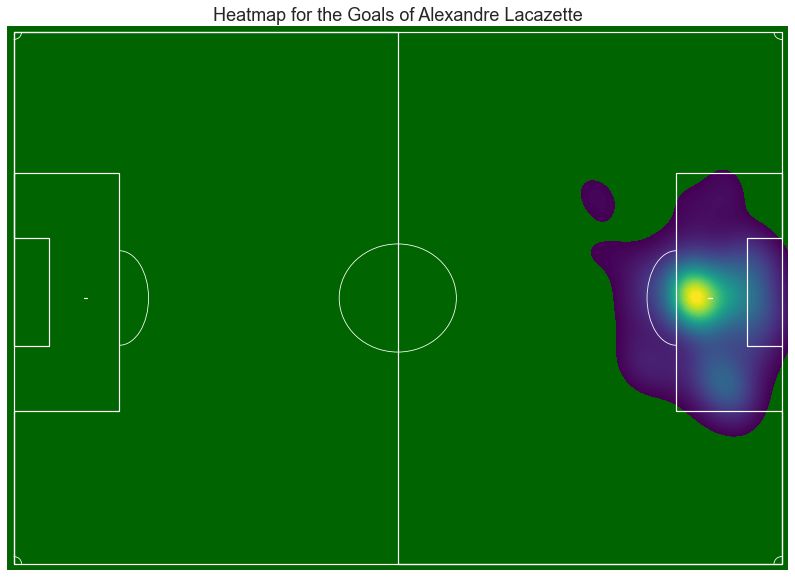

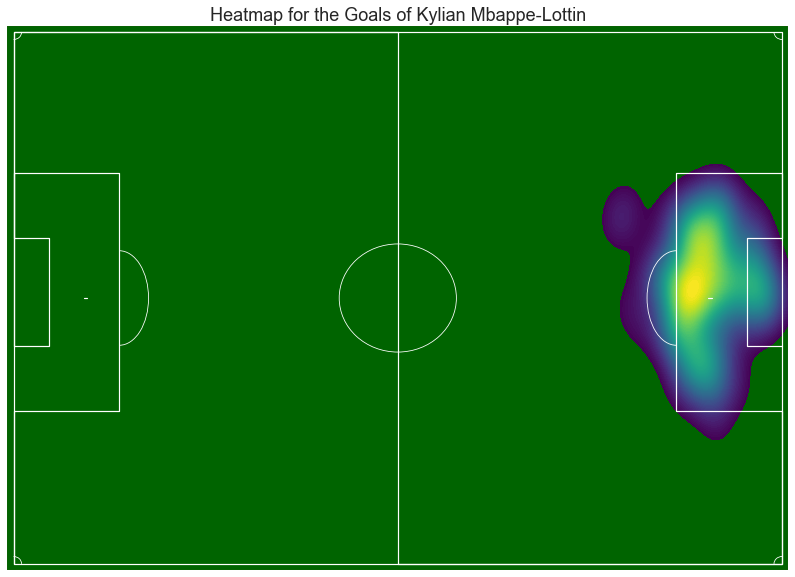

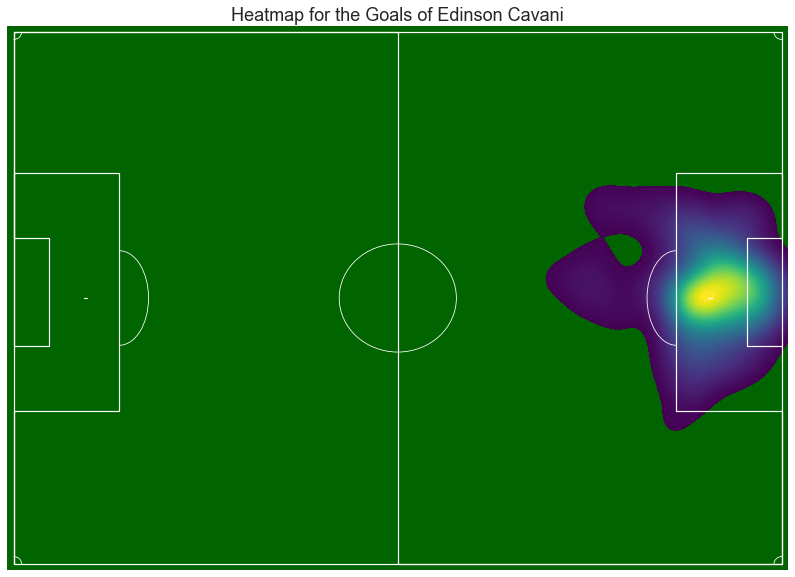

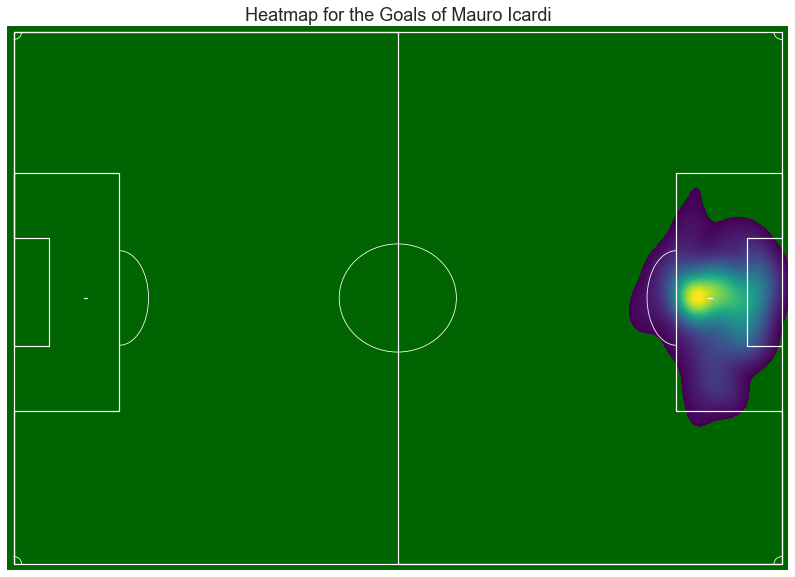

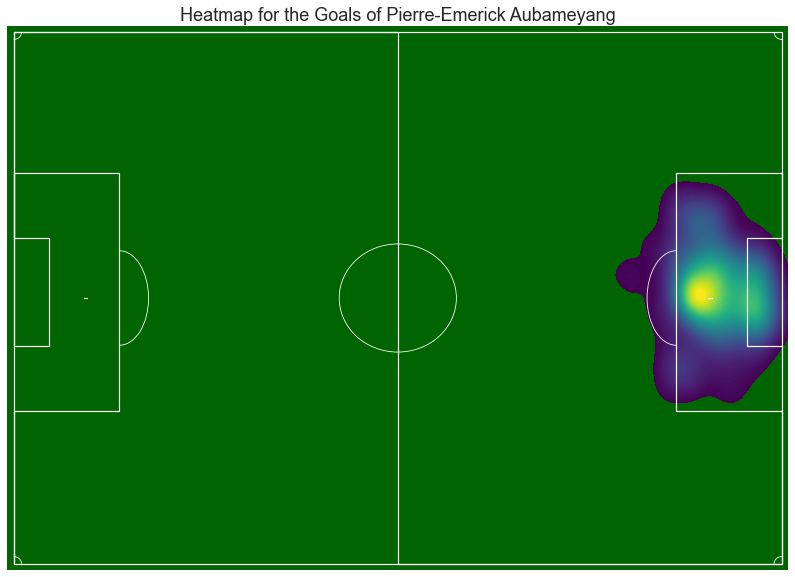

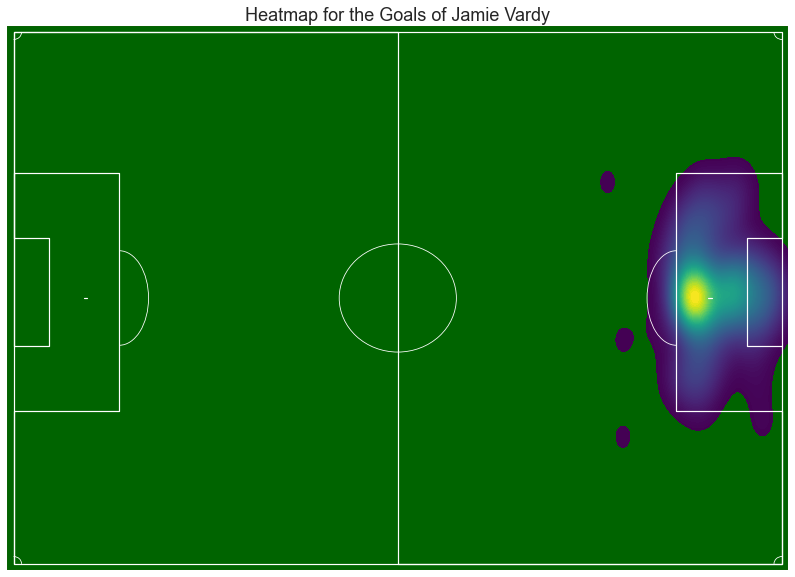

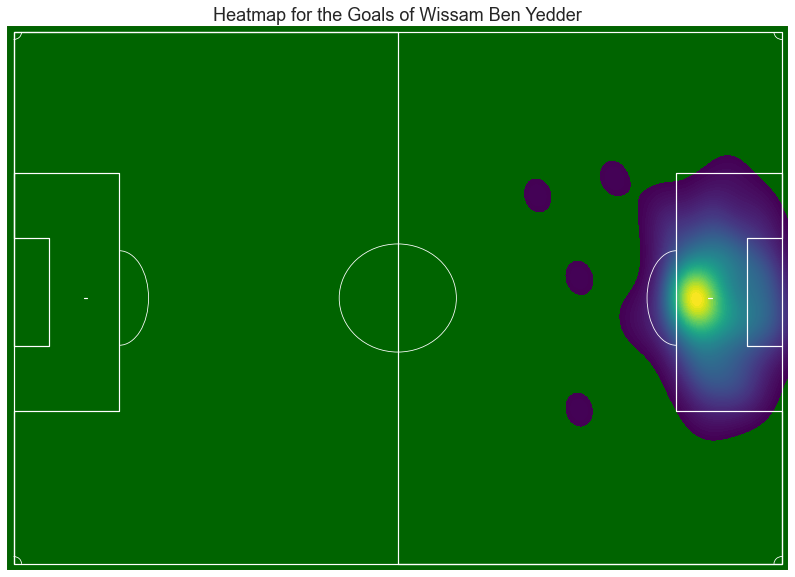

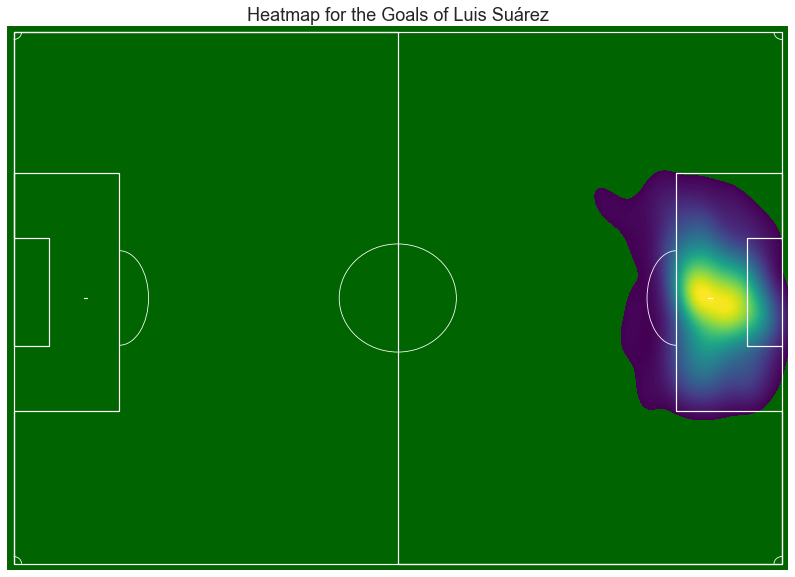

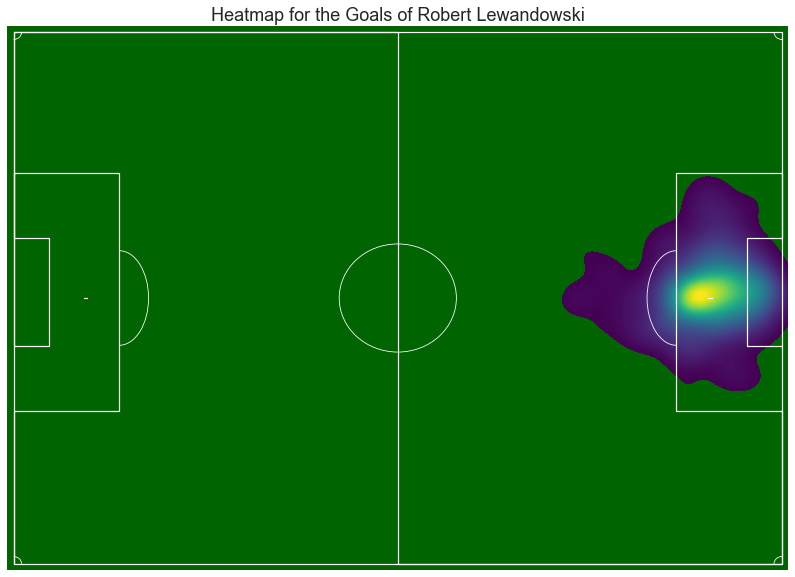

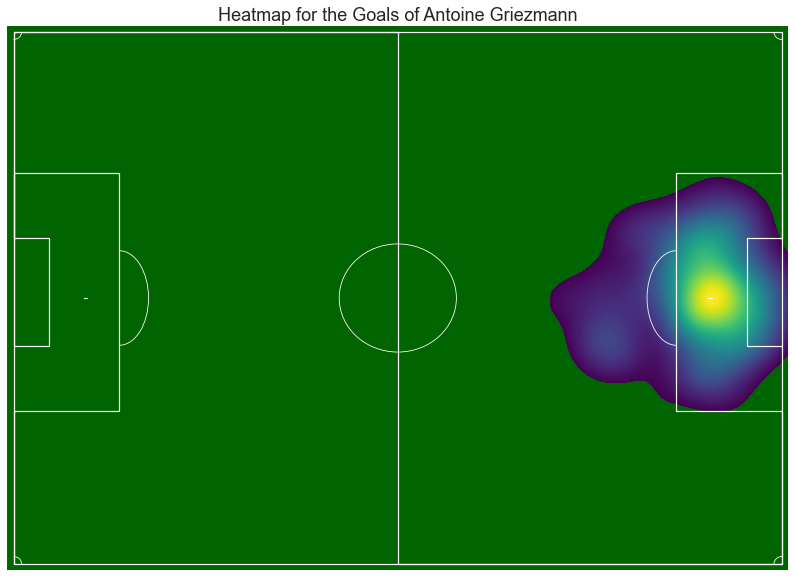

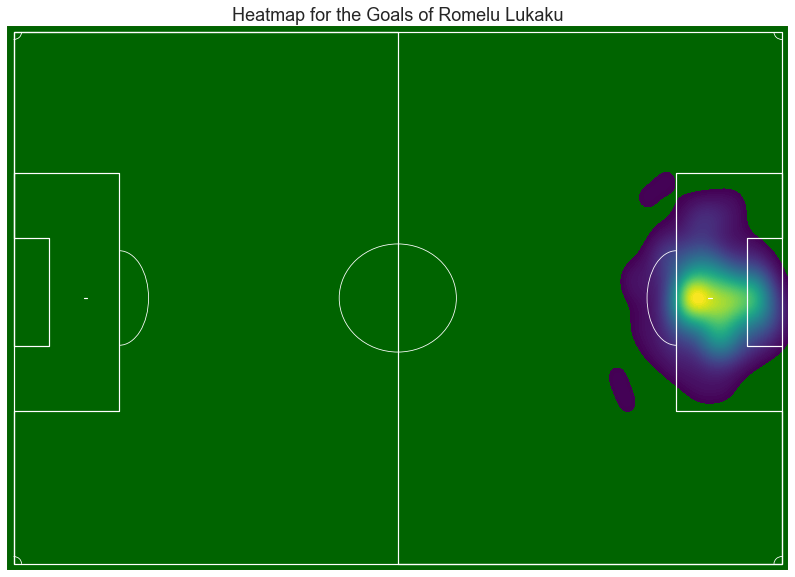

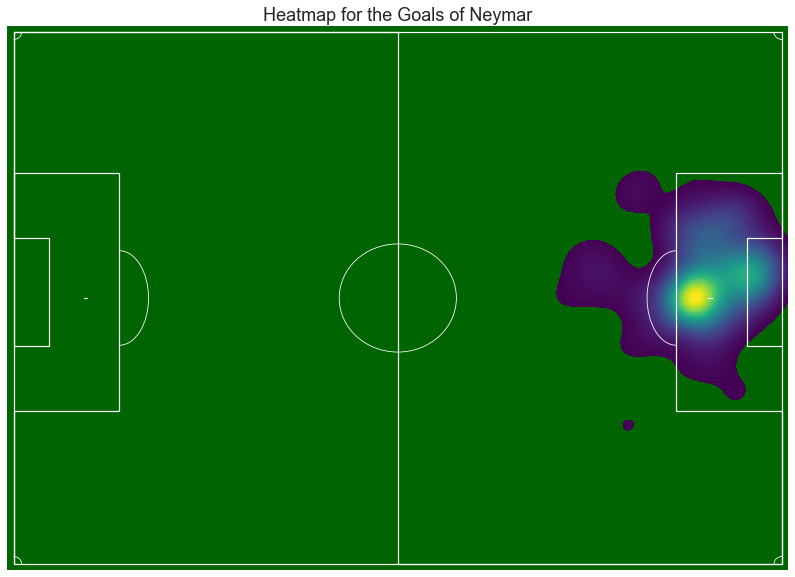

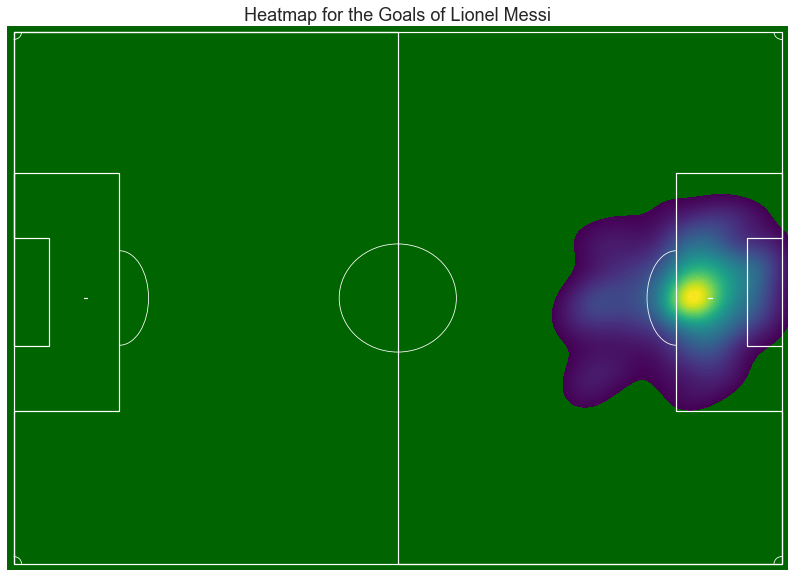

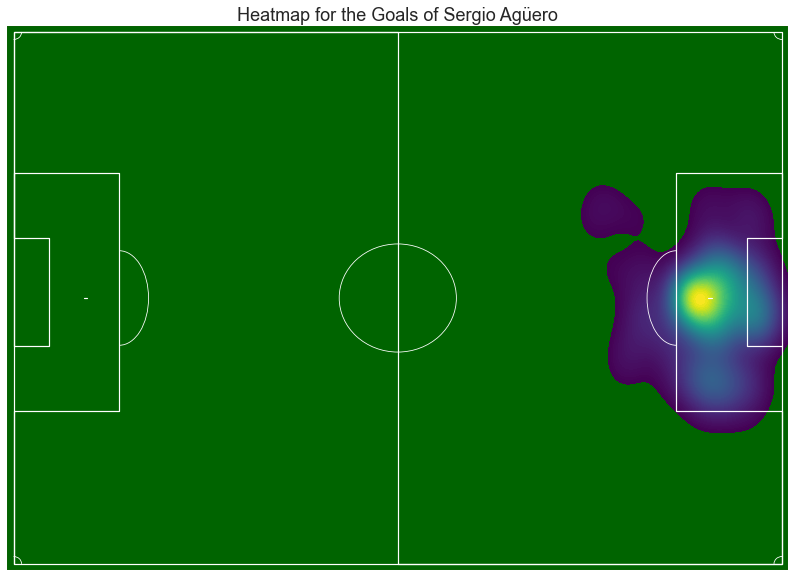

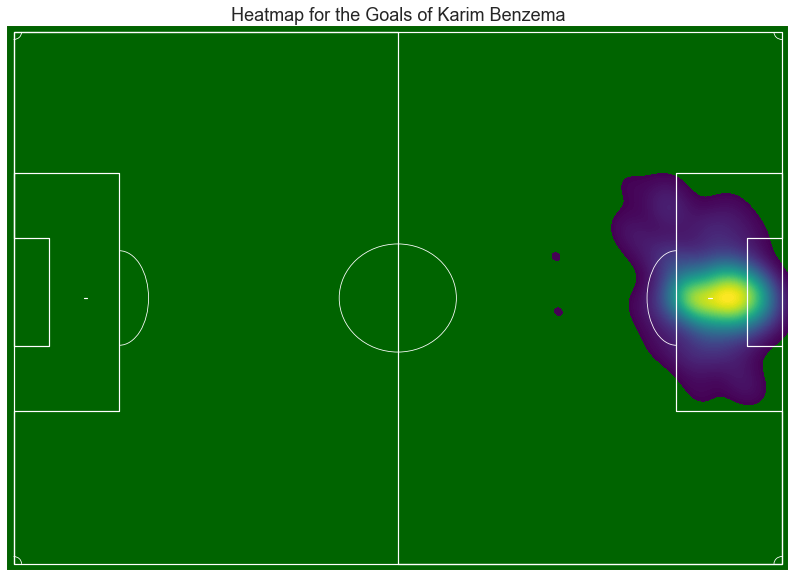

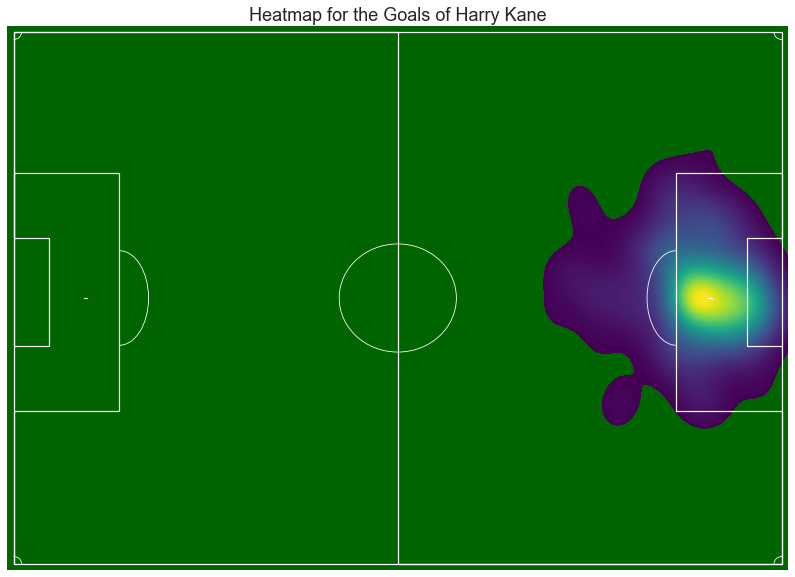

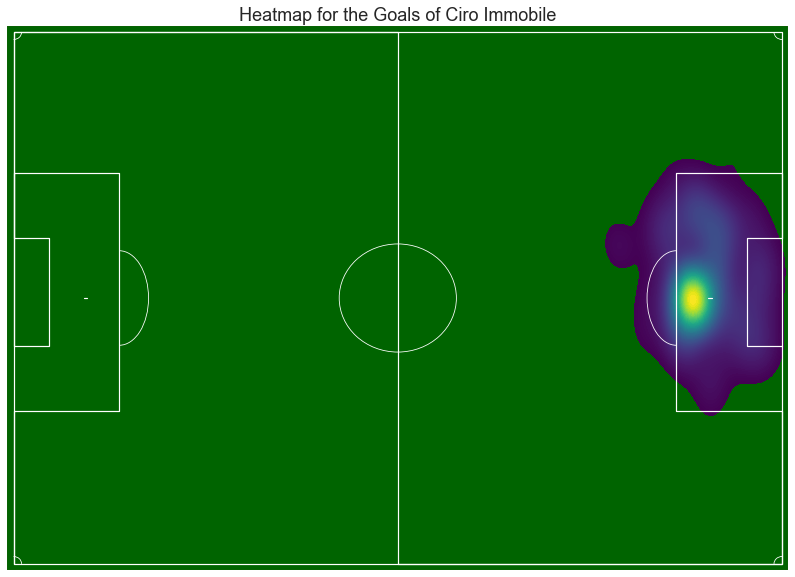

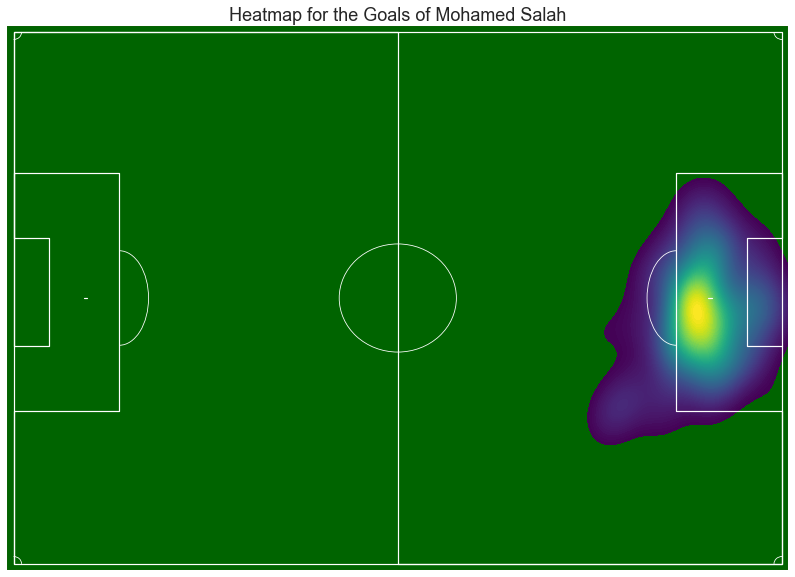

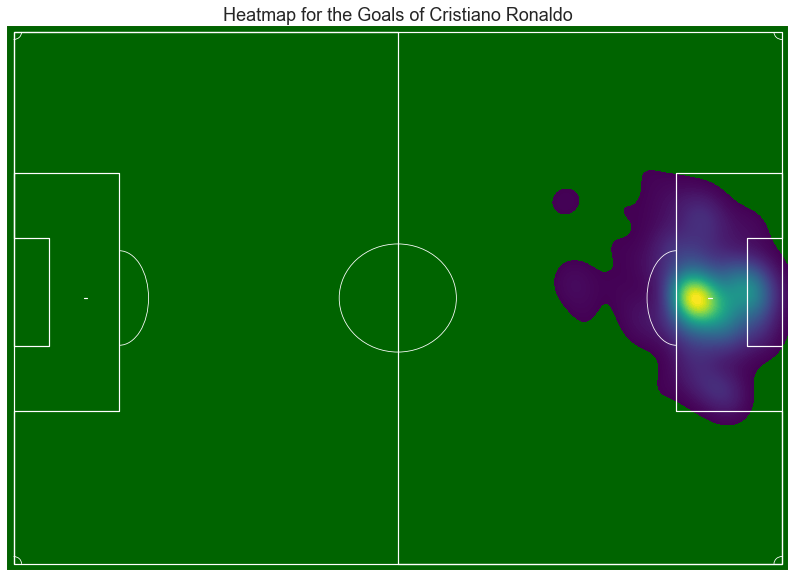

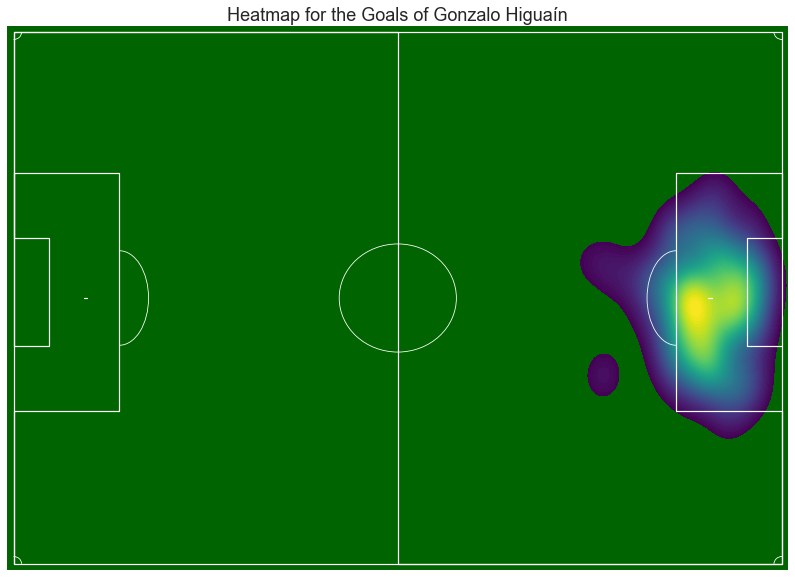

In [11]:
# Heatmap of the Goals for all 20 Top Scorers

for i in top:
    # Filter
    df = goals[goals['name'] == i]
    
    # Ploat Style
    plt.style.use('tableau-colorblind10')
    draw_soccer_pitch(figsize=(14, 10))
    
    # Plot Configuration
    ax = sns.kdeplot(x=df['positionX'], y=df['positionY'], shade=True, n_levels=100, cmap='viridis')
    ax.set_title(f'Heatmap for the Goals of {i}', fontsize=18)
    plt.savefig(f'pictures/{i}_heatmap.png', transparent=True)
    plt.show()

Vemos que el comportamiento de los graficos de calor de todos los jugadores en el Top 20 es bastante similar.

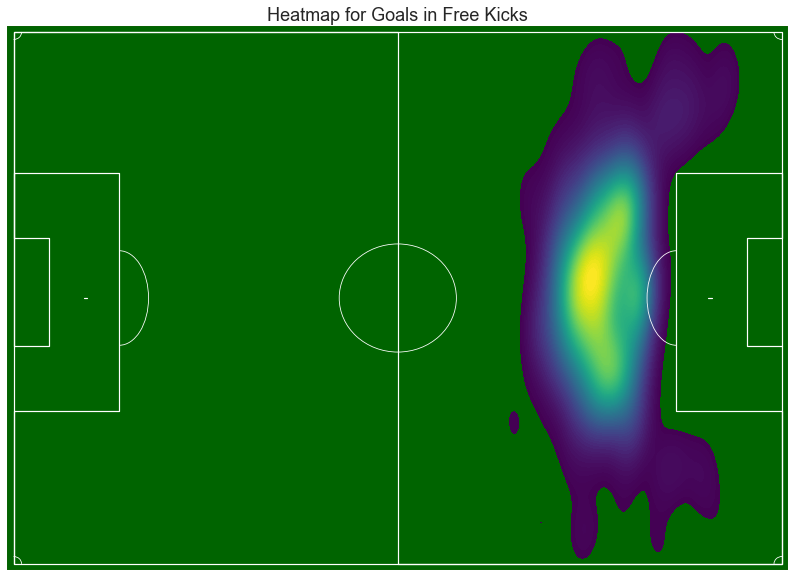

In [12]:
# Heatmap for all the goals made vy Freekick

# Filter
free_kick = goals[(goals['situation'] == 'DirectFreekick')]

# Plot Style
plt.style.use('tableau-colorblind10')
draw_soccer_pitch(figsize=(14, 10))

# Plot configuration
ax = sns.kdeplot(x=free_kick['positionX'], y=free_kick['positionY'], shade=True, n_levels=100, cmap='viridis')
ax.set_title('Heatmap for Goals in Free Kicks', fontsize=18)
plt.savefig(r"pictures\fk_heatmap.png", transparent=True)
plt.show();

---

¿En qué minuto de juego se conceden más goles?

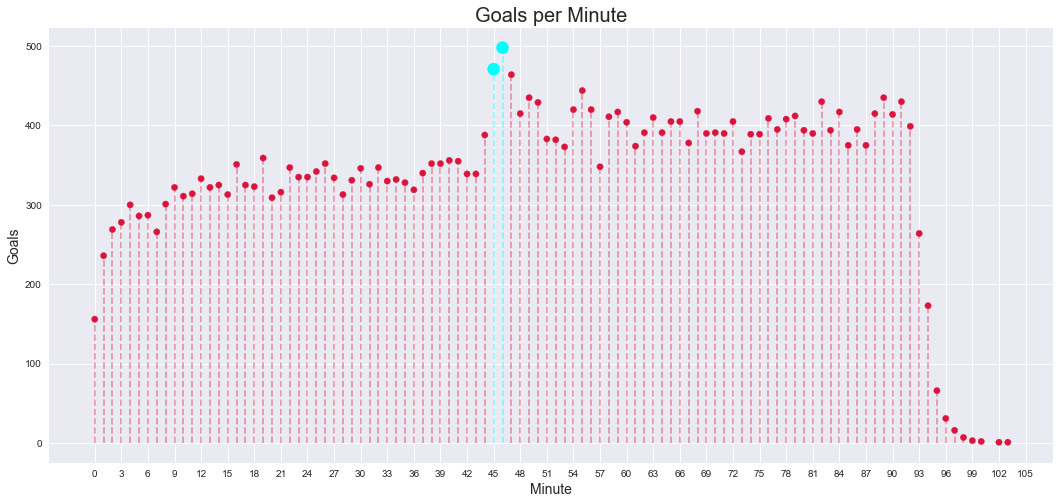

In [13]:
# Goals in each Minute of the Game

# Filter
goals_per_minute = goals.groupby('minute', as_index=False).count()

# Colores para resaltar para cada lollipop. Los minutos con las Goles reciben otro tipo de color y tamaño
my_color = ['aqua' if (minute==45 or minute==46) else 'crimson' for minute in goals_per_minute['minute']]
my_size = [150 if (minute==45 or minute==46) else 40 for minute in goals_per_minute['minute']]

# Plot Style
plt.style.use('seaborn')
plt.figure(figsize=(18, 8))

# Plot Configuration. Unimos lineas verticales con un scatter plot
plt.vlines(x=goals_per_minute['minute'], ymin=0, ymax=goals_per_minute['shotResult'], color=my_color, alpha=0.4, linestyle='dashed')
plt.scatter(goals_per_minute['minute'], goals_per_minute['shotResult'], color=my_color, s=my_size, alpha=1)
 
plt.ylabel('Goals', fontsize=14)
plt.xlabel('Minute', fontsize=14)
plt.title('Goals per Minute', fontsize=20)
plt.xticks(np.arange(0, 106, 3))
ax.grid(color='w', linewidth=0.5, alpha=0) 
plt.savefig(r"pictures\goals_per_minute.png", transparent=False)
plt.show()

Podemos ver que la mayoría de los goles suceden en el minuto 45 y 46, es decir, al final de primer tiempo y al principio del segundo tiempo. Esto se debe a dos motivos, en primer lugar, a un cansancio por parte de los jugadores y en segundo lugar a una falta de concentración.

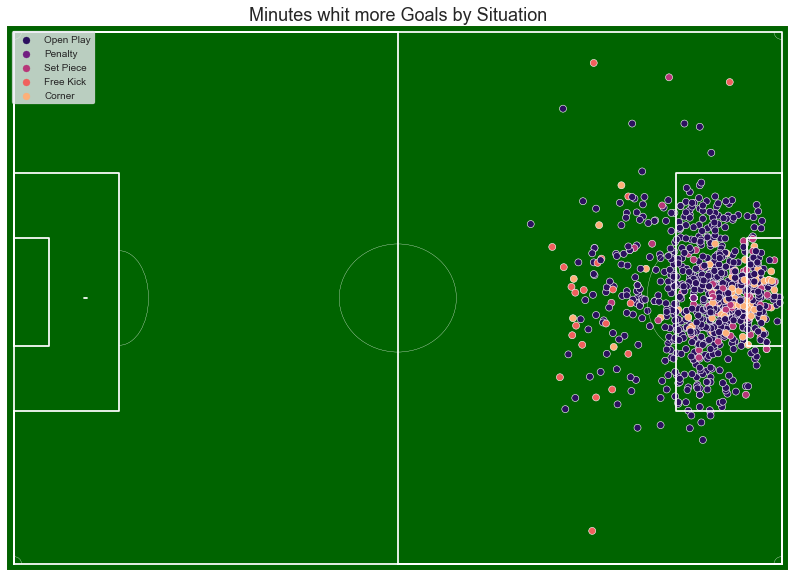

In [14]:
# Goals for the minute 45 and 46 by situation

# Filter
filt = goals[(goals['minute'] <= 46) & (goals['minute'] >= 45)]

# Plot Style
plt.style.use('tableau-colorblind10')
draw_soccer_pitch(figsize=(14, 10))

# Name for our legend labels
legend_labels = ['Open Play', 'Penalty', 'Set Piece', 'Free Kick', 'Corner']

# Plot Configuration
ax = sns.scatterplot(data=filt, x='positionX', y='positionY', hue='situation', palette='magma')
ax.set_title('Minutes whit more Goals by Situation', fontsize=18)
legend = plt.legend(loc='upper left', frameon=True)
[legend.get_texts()[i].set_text(legend_labels[i]) for i in range(len(legend_labels))]
plt.savefig(r"pictures\goals_45_46_situation.png", transparent=True);

En esta grafica de dispersión se observa que la mayoría de los goles que ocurren en los minutos 45 y 46 suceden dentro de área. Lo que refuerza nuestra hipótesis de que los goles suceden por errores defensivos causados por el cansancio y la falta de concentración.

---

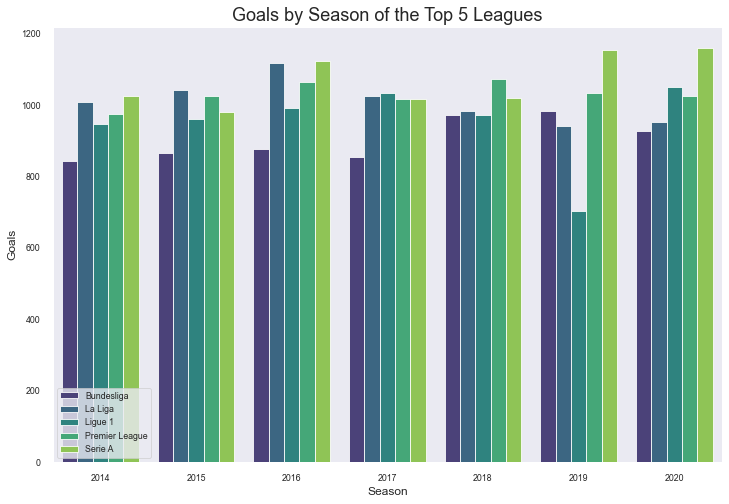

In [15]:
#Number of League Goals per Year

# Para este grafico en particular tenemos que unir varias tablas, ya que la informacion la tenemos dispersa
# Unimos la tablas de League y Appearances con la llave de 'leagueID'
liga_goal = pd.merge(appearances, leagues, how='left', on='leagueID')
liga_goal.rename(columns={'name': 'league_name'}, inplace=True)

# Unimos la tabla creada previamente con la tabla de teamstats a partir de la llave 'gameID'
liga_goal = pd.merge(teamstats, liga_goal, how='right', on='gameID')

# Hacemos nuestro filtrado a partir de agrupaciones. Hay que tener cuidado de perder informacion al hacer esto
liga_goal_total = liga_goal.groupby(['location', 'gameID', 'goals_x', 'league_name', 'season'], as_index=False).size()
liga_goal_total = liga_goal_total.groupby(['season', 'league_name'], as_index=False).sum('goals_x')

# Plot Style
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (12, 8)})

# Plot Configuration
ax = sns.barplot(data=liga_goal_total, x='season', y='goals_x', hue='league_name', palette='viridis')
ax.set_ylabel('Goals', fontsize=12)
ax.set_xlabel('Season', fontsize=12)
ax.set_title('Goals by Season of the Top 5 Leagues', fontsize=18)
plt.legend(loc='lower left', frameon=True)
ax.grid(color='w', linewidth=0.5, alpha=0)
plt.savefig(r"pictures\goal_leagues.png", transparent=True);

<AxesSubplot:xlabel='shots', ylabel='ppda'>

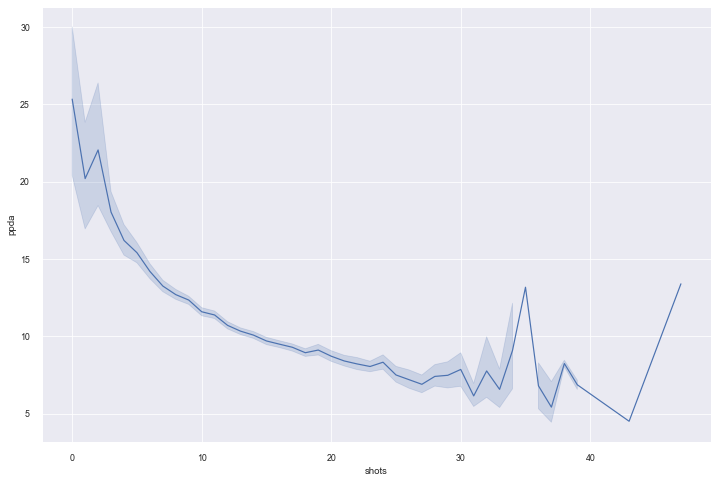

In [16]:
# Pases seguidos por el rival permitidos en funcion de los tiros realizados
# Mientras mas bajos sean los pases permitidos mas posesion tiene el equipo propio, lo que se traduce en mas tiros

sns.lineplot(data=teamstats, x='shots', y='ppda')

Datos obtenidos para la presentacion. Como promedio de edades, cantidad de goles y tiros especificos, entre otros.

In [17]:
# Ration, goals and Shots

best_strikers

,name,goals,shots,ratio
11,Alexandre Lacazette,126,521,0.241843
18,Kylian Mbappe-Lottin,107,453,0.236203
7,Edinson Cavani,132,560,0.235714
12,Mauro Icardi,121,535,0.226168
5,Pierre-Emerick Aubameyang,149,670,0.222388
14,Jamie Vardy,118,536,0.220149
19,Wissam Ben Yedder,107,490,0.218367
3,Luis Suárez,173,795,0.217610
2,Robert Lewandowski,203,943,0.215270
15,Antoine Griezmann,116,569,0.203866


In [18]:
# Aproximacion del porcentaje de goles dentro del area de calor

perc_goals = goals[(goals['positionX'] >90) & (goals['positionY'] > 24.85) & (goals['positionY'] < 65.15)].count()['shotResult']
print(perc_goals / goals['shotResult'].count())

0.9582004753898776


In [19]:
# Goles en nuestra base de datos
goals['shotResult'].count()

34498

In [20]:
# Porcentaje de penales que terminaron en gol en nuestra base de datos
num_penalty = goals[goals['situation'] == 'Penalty'].count()['shotResult']
print((num_penalty / goals['shotResult'].count()) * 100)

8.922256362687692


In [21]:
edad = [34, 36, 33, 34, 28, 32, 31, 34, 33, 29, 28, 30, 28, 33, 34, 30, 29, 33, 22, 31]
edad_prom = sum(edad) / len(edad)
edad_prom

31.1